In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
import sklearn

from sklearn.datasets import load_boston # to load  datasets from sklearn
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

from collections import Counter
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
import pandas as pd
import math

In [3]:
boston = load_boston()
# Shape of Boston datasets
print(boston.data.shape)

(506, 13)


In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [14]:
columnNames = boston.feature_names
print(columnNames)
Data = pd.DataFrame(boston.data, columns = columnNames)


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [15]:
# real price values of bostan house datasets.
print(boston.target[:10])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


In [16]:
Data_Labels = boston.target
Data_Labels.shape
Data["PRICE"] = Data_Labels
print(Data.shape)
print(Data.head(2))

(506, 14)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   

   PTRATIO      B  LSTAT  PRICE  
0     15.3  396.9   4.98   24.0  
1     17.8  396.9   9.14   21.6  


# Replace nan values

In [17]:
Data.isnull().sum()
Data.isnull().values.any()
Data.apply(lambda x: x.fillna(x.mean()),axis=0)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


# Train_test_split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(Data, Data["PRICE"],test_size = 0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape
print(X_train.head(10))

         CRIM     ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
73    0.19539    0.0  10.81   0.0  0.413  6.245    6.2  5.2873   4.0  305.0   
45    0.17142    0.0   6.91   0.0  0.448  5.682   33.8  5.1004   3.0  233.0   
438  13.67810    0.0  18.10   0.0  0.740  5.935   87.9  1.8206  24.0  666.0   
46    0.18836    0.0   6.91   0.0  0.448  5.786   33.3  5.1004   3.0  233.0   
385  16.81180    0.0  18.10   0.0  0.700  5.277   98.1  1.4261  24.0  666.0   
222   0.62356    0.0   6.20   1.0  0.507  6.879   77.7  3.2721   8.0  307.0   
29    1.00245    0.0   8.14   0.0  0.538  6.674   87.3  4.2390   4.0  307.0   
319   0.47547    0.0   9.90   0.0  0.544  6.113   58.8  4.0019   4.0  304.0   
57    0.01432  100.0   1.32   0.0  0.411  6.816   40.5  8.3248   5.0  256.0   
405  67.92080    0.0  18.10   0.0  0.693  5.683  100.0  1.4254  24.0  666.0   

     PTRATIO       B  LSTAT  PRICE  
73      19.2  377.17   7.54   23.4  
45      17.9  396.90  10.21   19.3  
438     20.2   68.9

In [19]:
Y_train.isnull().sum()

0

# Implementation of SGD

In [21]:
#Implementation of Stochastic Gradient Descent by taking 10 random samples
#First Standadize the data
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
std_scale = scaler.fit(X_train[['CRIM', 'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']])
train_standadized= std_scale.transform(X_train[['CRIM', 'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']])
test_standadized= std_scale.transform(X_test[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']])

In [22]:
X_train_standadized = pd.DataFrame(train_standadized, columns = columnNames)
X_test_standadized = pd.DataFrame(test_standadized, columns = columnNames)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)
print(Y_train)
print(Y_train.shape)
print(X_train_standadized.shape)

[23.4 19.3  8.4 20.   7.2 27.5 21.  21.  31.6  5.  14.1 33.4 19.  21.5
 22.9 29.1 19.1 29.8 18.4 17.8 19.5 23.1 20.3 29.4 24.1 46.7 27.9 29.
 19.4 18.4 24.   7.2 21.4 50.   6.3 50.  10.2 14.1 30.7 34.9 22.6 28.7
 19.8 50.  16.5 10.9 21.6 19.4 20.6 23.8 19.8 19.9 15.  26.5 20.4 23.1
 22.  22.  11.3 23.8 14.6 20.2 32.  24.3 25.1 22.  12.7 16.6 26.4 23.6
 19.2  8.8 24.6 19.1 28.4 37.2 22.2 24.5 18.5 21.5 30.1 13.4 25.  20.8
 12.6 21.2 18.1 13.1 50.  33.  10.2 14.3 20.4 28.1 16.8 20.9 34.6 11.7
 17.4 23.1 18.3 11.9 10.8 48.3 24.8 36.2 19.9 21.4 41.7 21.9 50.  17.2
 18.9 17.8 24.8 16.1 32.5 50.  15.1 38.7 17.2 14.8 14.5 32.7 25.  22.
 22.4 30.5 27.1 24.4  9.5 21.1 24.8 45.4 23.5 36.5 17.8 18.3 23.1 15.6
 17.3  9.7  8.3 14.  20.9 20.  22.9 21.2 35.4 20.1 31.7 34.9  5.  15.
 32.2 16.7 17.2 16.6 13.4 26.2 16.  36.  14.4 18.9 19.1 20.1 20.6 13.8
 18.  20.8 28.6 22.7 19.4 13.6 24.4 13.8 23.8 21.2 26.6 33.1 19.4 14.6
 17.5 21.7 15.  25.3 20.4  8.7 29.6 26.6 42.8 37.  24.6  7.  18.8 10.5
 27.9 19.

In [23]:
X_train_standadized['PRICE']=Y_train
X_test_standadized['PRICE']=Y_test

In [24]:
print(X_train_standadized.shape)
print(X_test_standadized.shape)

(404, 14)
(102, 14)


In [25]:
X_train_standadized.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

# SGD

In [28]:
# for references
#https://github.com/gauravtheP/Implementing-Stochastic-GradientDescent/blob/master/LinearRegression_SGD_BostonHomePrices.ipynb
#First step initilize the weights and b
#formulae of slope s=mx+b.
# mx is the weights*x1....weights_d*xd
# b is the intercept term
m = X_train.shape[0]
weight = np.random.randn(13)*np.sqrt(2/m) # defining initial random weight from normal distribution
b = np.random.randn(1)*np.sqrt(2/m) # generating initial random y-intercept from normal distribution
# initilize learing rate
learningRate = 0.2
print(m,weight,b,learningRate)
for i in range(2000): # running 2000 iterations
    Data_batch_10 = X_train_standadized.sample(n = 10) # taking 10 stochastic samples
    X_temp = Data_batch_10.drop("PRICE", axis = 1, inplace = False) # DROP the price label, because this is the output label we have to predict.
#X = pd.DataFrame(X_temp, columns = columnNames)
    X=X_temp
    Y = Data_batch_10["PRICE"]
    PartialGradient = np.empty(13)# in this we store the partial derivate with respect to w...we have 13 features  13 features
    sum2 = 0
# Update the weights-------------------------------
# formula (w0=w1-lr*derivate)in every iteration
# step 1.
#First calculate the derivative
    for j in range(13): # as there are 13 dimensions in our dataset and dimensions of weight should also be same as dimension of our dataset
        sum1 = 0
        for k in range(10):
            sum1 += -2 * X.iloc[k][j] * (Y.iloc[k] - np.dot(weight, X.iloc[k]) - b) # this is a derivative of linear regression w.r.t 'w
        PartialGradient[j] = sum1
# step 2.
#multiply with learning rate
    PartialGradient *= learningRate
#step 3.
#Update the weights
    for l in range(13):
        weight[l] -= PartialGradient[l] # updating weights
# Update the Intercepts or (b's)-------------------------------
    for m in range(10):
        sum2 += -2 * (Y.iloc[m]- np.dot(weight, X.iloc[m]) - b) # this is the derivative of linear regression w.r.t 'b'
    b = b - learningRate * sum2 #updating y-intercept 'b'
# in every iteration u have to reduce the learing rate bro
    learningRate = 0.01 / pow(i+1, 0.25) #learning rate at every iteration
# just add the regularization term to it
    weight = weight + 0.0001*np.dot(weight, weight) #adding l2 regularization
    b = b + 0.0001*np.dot(weight, weight) #adding L2 regularization
print("Weight = "+str(weight))
print("b = "+str(b))

404 [ 0.06860788  0.08899781 -0.13299221  0.01283731  0.13891196  0.0609817
 -0.06443528  0.00046115 -0.10548441  0.03947253  0.05610601 -0.01364426
 -0.1491161 ] [0.10787514] 0.2
Weight = [-0.81797771  1.36606222  0.61476667  0.63295946 -1.82274377  3.55709996
  0.04545461 -1.86569186  2.46296413 -2.41683874 -1.94809464  1.25010071
 -2.71808609]
b = [23.0927888]


In [29]:
# time for testdata.. with our updated weights and coeffcients
import math
test_temp = X_test_standadized.drop("PRICE", axis = 1, inplace = False)
test_data = test_temp
test_labels = Y_test
y_predicted = []
for i in range(102):
    test_i = 0
    test_i = np.dot(weight, test_data.iloc[i]) + b[0] #making prediction by using optimize values of weights obtained from SGD
    y_predicted.append(test_i)

In [30]:
#Make the preditions
d1 = {'True Labels': Y_test, 'Predicted Labels': y_predicted}
df1 = pd.DataFrame(data = d1)

In [31]:
Mean_Sq_Error = mean_squared_error(Y_test, y_predicted)
print(Mean_Sq_Error)

24.398601338356574


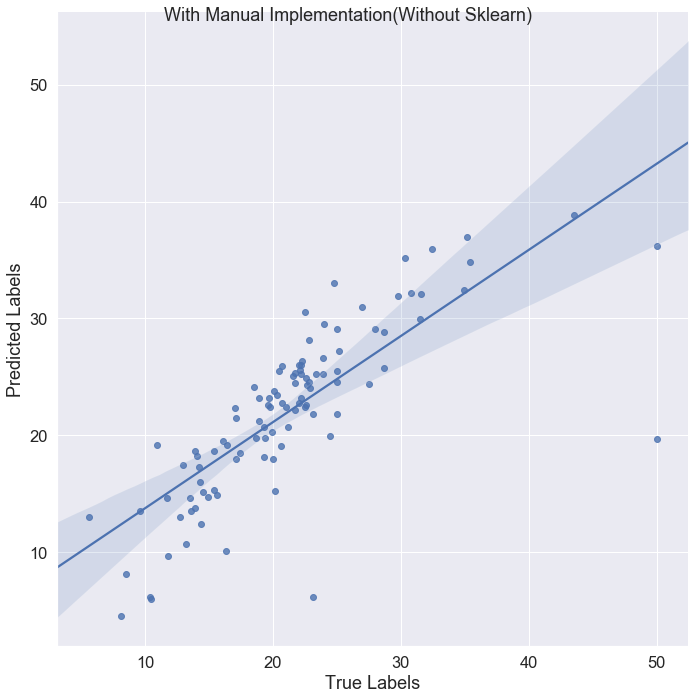

In [37]:
import seaborn as sns
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = df1, height = 10)
fig1 = lm1.fig
fig1.suptitle("With Manual Implementation(Without Sklearn)", fontsize=18)
sns.set(font_scale = 1.5)

In [38]:
#Sklearn implementation
X_temp = X_train_standadized.drop("PRICE", axis = 1, inplace = False)
X=X_temp
Y = Y_train
X_test_temp = X_test_standadized.drop("PRICE", axis = 1, inplace = False)
X_te=X_test_temp
Y_te = Y_test
clf = SGDRegressor(shuffle = False, learning_rate= 'invscaling', max_iter = 2000)
clf.fit(X, Y)# fir train data
Y_pred = clf.predict(X_te)# predict test error
print("Weight = "+str(clf.coef_))
print("Y Intercept = "+str(clf.intercept_))

Weight = [-0.90939854  1.02064702  0.25488595  0.80984814 -2.04099089  3.22020808
 -0.22713055 -2.9395672   2.20830125 -1.67917236 -2.21350137  0.83330622
 -3.38823594]
Y Intercept = [22.8789032]


In [39]:
d2 = {'True Labels': Y_te, 'Predicted Labels': Y_pred}
df2 = pd.DataFrame(data = d2)
df2


,True Labels,Predicted Labels
0,14.5,13.597150
1,50.0,21.909100
2,20.1,20.693969
3,21.7,24.377509
4,14.3,17.060124
5,22.1,26.585704
6,5.6,12.043729
7,22.8,28.415784
8,35.2,36.687352
9,21.0,22.785727


In [40]:
Mean_Sq_Error = mean_squared_error(Y_te, Y_pred)
Mean_Sq_Error

22.22266923710572

C:\anaconda\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


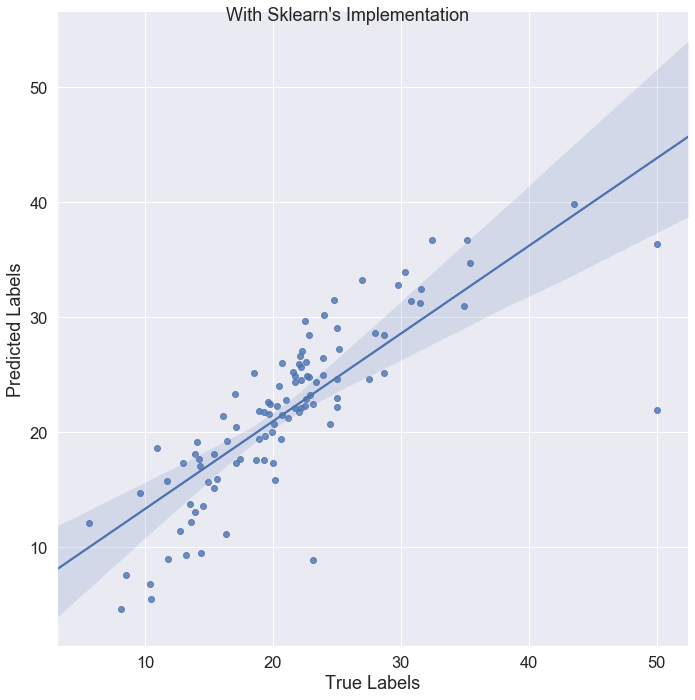

In [36]:
lm2 = sns.lmplot(x="True Labels", y="Predicted Labels", data = df2, size = 10)
fig2 = lm2.fig
# Add a title to the Figure
fig2.suptitle("With Sklearn's Implementation", fontsize=18)
sns.set(font_scale = 1.5)

# Result:

My SGD impementation error- > 24.39
Sklearn SGD impementation error- > 22.22